# Predict your next glasses

## By Lior Or Shraga and Nava Sasson

In our project we want to predict, given a glasses and additional information about it, what is the percentage of buyers who would recommend buying it.

Our target column for prediction is the buyer's recommendations column.


# Our data sources:

We import the data from Zenni's site. 

In addition we researched about functions from the websites below:

*Chat gpt

*Geeks for geeks

*Campus il

*Stack overflow

*Shakedzy

*Numpy

*Selenium website

*matplotlib website




#### Starting with import the libraries:


# Liabraries

In [11]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import time
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.action_chains import ActionChains

# Crawling

We will define lists for each column in our dataframe

In [5]:
####################################lists of all the features###########################################
name=[]
price = []
size = []  
rating_stars = []
recommend = []
style = []
q_high = []
q_average=[]
q_low=[]
fit_true_to_size=[]
fit_tight=[]
fit_loose=[]
genders= []
###################################Specifications Features#############################################
pd_range = []
    #is the distance, in millimeters, between the center of one pupil to the center of the other
prescription_range_start = []
prescription_range_end=[]
    #This is an approximate range based on the spherical (SPH) value
progressive_bifocal = [] 
    #bifocal- to long and sort distance #progressive- help to see clearly from all distance- it is a bool list- yes or no
readers = [] 
    #bool list
rim = []
    #frame- 3 option: Full Rim, Half Rim, Rimless
shape = []
material = []
features = []
    #Features such as: Lightweight , Nose Pads
###################################Frame Size##########################################################
frame_width = []
lens_width = []
bridge = [] 
temple_length = []
lens_height = []
frame_weight = []

# selenium

We will now go through all the pages on the website and collect the links of all the glasses

In [6]:
#URL of zenni_home_url
start_with = "https://www.zennioptical.com" 
#Lists of links and html_pages
links = []
html_list = []

In [7]:
def get_links(last_page, url, gender):
    driver = webdriver.Chrome(executable_path=r"C:\Users\נאוה ששון\Desktop\מדעי המחשב\שנה ב\סמסטר א\מבוא למדעי הנתונים- שיטות וכלים\project\chromedriver_win32\chromedriver.exe")
    driver.get(url)
    
    # We will go through all the pages of Zenni with Selenium, after that,we will collect the links of all the glasses
    # from the last page and put them in links list
    for page in range(0,last_page):
        # Waiting that the page loading ---- (chatGpt)
        wait = WebDriverWait(driver, 10) 
        # loading_element  
        wait.until(EC.invisibility_of_element_located((By.CLASS_NAME, "loading")))
        # get element of next page
        element = driver.find_element(By.XPATH, '/html/body/div[1]/div[1]/div/div[6]/div[2]/div[2]/div[4]/button')
        # create an instance of the Actions class
        actions = ActionChains(driver)
        # perform the click on the button using the click method of the Actions class
        actions.move_to_element(element).click().perform()
        
    #give us the html page
    html_source= driver.execute_script("return document.documentElement.outerHTML") ##chatGpt
    soup= BeautifulSoup(html_source,"html.parser")   
    for f in soup.find_all("div", {"class", "card-cover"}):
        for link in f.find_all("a"):
            links.append(start_with + link.get("href")) 
            genders.append(gender)
    driver.close()

Running the function with links to the home pages of women's, men's and children's glasses. We also give the last page that the home page gets.

In [21]:
get_links(9, 'https://www.zennioptical.com/b/all-kids-glasses?page=0', 'K')
get_links(37, 'https://www.zennioptical.com/b/all-men-glasses?page=0', 'M')
get_links(51, 'https://www.zennioptical.com/b/all-women-glasses?page=0', 'W')

<ipython-input-20-614af4fe1676>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"C:\Users\נאוה ששון\Desktop\מדעי המחשב\שנה ב\סמסטר א\מבוא למדעי הנתונים- שיטות וכלים\project\chromedriver_win32\chromedriver.exe")


In [10]:
links

['https://www.zennioptical.com/p/womens-tr-oval-eyeglass-frames/1273?skuId=127339',
 'https://www.zennioptical.com/p/girls-tr-rectangle-eyeglass-frames/1248?skuId=124817',
 'https://www.zennioptical.com/p/kids-plastic-square-eyeglass-frames/20119?skuId=2011921',
 'https://www.zennioptical.com/p/tr-round-eyeglass-frames/20291?skuId=2029150',
 'https://www.zennioptical.com/p/kids-acetate-round-eyeglass-frames/44153?skuId=4415323',
 'https://www.zennioptical.com/p/girls-other-plastic-rectangle-eyeglass-frames/1288?skuId=128821',
 'https://www.zennioptical.com/p/plastic-square-eyeglass-frames/1280?skuId=128012',
 'https://www.zennioptical.com/p/kids-acetate-round-eyeglass-frames/44330?skuId=4433023',
 'https://www.zennioptical.com/p/girls-square-eyeglass-frames/78293?skuId=7829317',
 'https://www.zennioptical.com/p/kids-tr-square-eyeglass-frames/20357?skuId=2035739',
 'https://www.zennioptical.com/p/acetate-plastic-square-eyeglass-frames/1249?skuId=124925',
 'https://www.zennioptical.com/p

In [12]:
len(links)

2350

In [24]:
csv_file= pd.DataFrame({"links":links})
csv_file.to_csv("all_links.csv")

We will go through all the links we collected and use selenium to extract all the html pages

In [25]:
# Navigate to zenni homepage
driver = webdriver.Chrome(executable_path=r"C:\Users\נאוה ששון\Desktop\מדעי המחשב\שנה ב\סמסטר א\מבוא למדעי הנתונים- שיטות וכלים\project\chromedriver_win32\chromedriver.exe")
   
for link in links:

    driver.get(link)
    html_list.append(driver.page_source)
    time.sleep(2)
    
# close web browser
driver.close()

<ipython-input-25-b40c45de08c6>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"C:\Users\נאוה ששון\Desktop\מדעי המחשב\שנה ב\סמסטר א\מבוא למדעי הנתונים- שיטות וכלים\project\chromedriver_win32\chromedriver.exe")


In [26]:
csv_file_2= pd.DataFrame({"html_list":html_list})
csv_file_2.to_csv("html_list.csv")

# BeautifulSoup

We will now go through all the html pages we have collected and extract from there the data on the glasses for our dataframe

In [17]:
for html in html_list:
    soup= BeautifulSoup(html,"html.parser")
    #
    try: result= soup.find("div", {"class":"pdp-info col-md-6 col-lg-12 clearfix"}).find("h1",{"class":"color-gray-darker padding-left-0 padding-right-15 padding-top-0 padding-bottom-10 padding-left-0-lg padding-right-30-lg margin-top-0 margin-bottom-0 productName center-block-sm h2"}).string
    except:name.append("NaN") 
    else: name.append(result)
    ###
    try: result= soup.find("div", {"class":"visible-sm-table-cell margin-bottom-10 padding-right-20 padding-right-40-sm padding-right-50-md font-light color-gray-darker pdp-name-price hidden-xs width-50p-sm"}).find("span",{"class":"price"}).string
    except: price.append("NaN")
    else: price.append(result)
    ###
    try: result= soup.find("div", {"class":"rsr-circle--radial-progress___1XYxa"})["data-progress"]
    except: recommend.append("NaN") 
    else: recommend.append(result)
    ###
    try:result= soup.find("div", {"class":"pdp-info col-md-6 col-lg-12 clearfix"}).find("div",{"class":"rates visible-inline-block line-height-10"})["data-rating"]
    except:rating_stars.append("NaN")   
    else: rating_stars.append(result)
    ###
    try:result= soup.find("div", {"class":"graph-component___3f9-g graph-component"}).find("div", {"class":"graph__row-bar___2sqHH longest___1ZWNz"})['data-value']
    except: q_high.append("NaN")
    else: q_high.append(result)
    ###
    try:result= soup.find_all("div", {"class":"graph-component___3f9-g graph-component"})[0].find_all("div", {"class":"graph__row-bar___2sqHH"})[2]['data-value']
    except:q_average.append("NaN")
    else: q_average.append(result)
    ###
    try: result=soup.find("div", {"class":"graph__row___3KrI9 small-bar___1rScL"}).find("div", {"class":"graph__row-bar___2sqHH"})['data-value']
    except:q_low.append("NaN") 
    else: q_low.append(result)
    ###
    try:result= soup.find_all("div", {"class":"graph-component___3f9-g graph-component"})[1].find("div", {"class":"graph__row-bar___2sqHH longest___1ZWNz"})['data-value']
    except: fit_true_to_size.append("NaN")
    else: fit_true_to_size.append(result)
    ###
    try:result= soup.find_all("div", {"class", "graph__row-bar-container___2331W"})[4].find("div", {"class","graph__row-bar___2sqHH"})['data-value'] 
    except: fit_tight.append("NaN")
    else: fit_tight.append(result)
    ###
    try:result= soup.find_all("div", {"class":"graph-component___3f9-g graph-component"})[1].find_all("div", {"class":"graph__row-bar___2sqHH"})[1]['data-value']
    except:fit_loose.append("NaN")
    else: fit_loose.append(result)
    ###
    try:result= soup.find('div', {"class":"rsr-metrics__value___1JH4J rsr-metrics__value--style"}).string
    except:style.append("NaN")
    else: style.append(result)
    ###########
    try:result= soup.find("div", {"class":"specification col-md-6 padding-left-20 padding-left-35-sm padding-left-20-md padding-left-35-lg padding-top-10 padding-top-20-md padding-top-30-lg padding-bottom-30-md"}).find("span",{"class":"value"}).string.strip().split("-")[0]
    except:pd_range.append("NaN")  
    else: pd_range.append(result)
    ###
    try:
        size_var = soup.find("div", {"class":"specification col-md-6 padding-left-20 padding-left-35-sm padding-left-20-md padding-left-35-lg padding-top-10 padding-top-20-md padding-top-30-lg padding-bottom-30-md"}).find("li",{"class":"padding-top-5 padding-bottom-5 padding-top-10-md padding-bottom-8-md font-bold"}).find_all("a")
        result= size_var[0].string
    except: size.append("NaN") 
    else: size.append(result)
    ###
    try:result= soup.find("div", {"class":"specification col-md-6 padding-left-20 padding-left-35-sm padding-left-20-md padding-left-35-lg padding-top-10 padding-top-20-md padding-top-30-lg padding-bottom-30-md"}).find("li",{"class":"padding-top-5 padding-bottom-5 padding-top-10-md padding-bottom-10-md font-bold available-as"}).find("span",{"class":"value readers-value"}).string
    except:readers.append("NaN") 
    else: readers.append(result)
    ###
    try:result= soup.find("div", {"class":"specification col-md-6 padding-left-20 padding-left-35-sm padding-left-20-md padding-left-35-lg padding-top-10 padding-top-20-md padding-top-30-lg padding-bottom-30-md"}).find("li",{"class":"padding-top-5 padding-bottom-5 padding-top-10-md padding-bottom-10-md font-bold available-as"}).find("span",{"class":"value progressive-bifocal-value"}).string
    except: progressive_bifocal.append("NaN")
    else: progressive_bifocal.append(result)
    ###
    #the same var so we check it together:
    try:prescription_range_var = soup.find("li", {"class":"padding-top-5 padding-bottom-5 padding-top-10-md padding-bottom-10-md font-bold"}).find("span", {"id":"prescription-range"})
    except:
        prescription_range_start.append("NaN")
        prescription_range_end.append("NaN")
    else:
        prescription_range_start.append(prescription_range_var.string.strip().split("\n")[0])
        prescription_range_end.append(prescription_range_var.string.strip().split("~")[1]) 
    ###
    try:result = soup.find("div", {"class":"right-section col-sm-6"}).find_all("a")[0].string
    except:rim.append("NaN")
    else: rim.append(result)
    ###
    try: result = soup.find("div", {"class":"right-section col-sm-6"}).find_all("a")[1].string
    except:shape.append("NaN")
    else: shape.append(result)
    ###
    try: result = soup.find("div", {"class":"right-section col-sm-6"}).find_all("a")[2].string
    except:material.append("NaN")
    else: material.append(result)
    ###
    try:
        feature =  soup.find("div", {"class":"right-section col-sm-6"}).find_all("a")
        feat_list_var=[]
        for feat in feature:
            if feat.get("href") is not None and "/b/extended" in str(feat.get("href")) or '/b/Feature' in str(feat.get("href")):
                feat_list_var.append(feat.get("href").split("/b/")[1].split("/_/")[0])
    except:features.append("NaN")
    else: features.append(feat_list_var)
    ###
    try: result = soup.find("div", {"class":"left-section col-sm-6"}).find('span', {"class":"color-primary"}).find("span", {"class":"value"}).string
    except:frame_width.append("NaN")
    else: frame_width.append(result)
    ###
    try: result = soup.find("div", {"class":"left-section col-sm-6"}).find("li", {"class": "font-bold lens-width"}).find('span', {"class":"color-primary"}).find("span", {"class":"value"}).string
    except:lens_width.append("NaN")
    else: lens_width.append(result)
    ###
    try: result = soup.find("div", {"class":"left-section col-sm-6"}).find("li", {"class": "font-bold bridge"}).find("span", {"class":"color-primary"}).find("span", {"class":"value"}).string
    except:bridge.append("NaN")
    else: bridge.append(result)
    ###
    try: result =  soup.find("li", {"class":"font-bold temple-length"}).find("span", {"class":"color-primary"}).find("span", {"class":"value"}).string    
    except:temple_length.append("NaN")
    else: temple_length.append(result)
    ###
    try: result = soup.find("li", {"class":"font-bold lens-height"}).find("span", {"class":"color-primary"}).find("span", {"class":"value"}).string
    except:lens_height.append("NaN")
    else: lens_height.append(result)
    ###
    try: result = soup.find("li", {"class":"font-bold frame-weight"}).find("span", {"class":"color-primary"}).find("span", {"class":"value"}).string
    except:frame_weight.append("NaN")
    else: frame_weight.append(result)
    ###
    try: 
        result= soup.find("div", {"class", 'font-black color-gray-darker visible-inline-block line-height-10'}).find("span", {"class", 'color-primary font-regular margin-right-10'})
        result.string.split('(')[1].split(')')[0]
    except:reviews.append("NaN")
    else: reviews.append(result)

We will create a dictionary with the lists we prepared and use it in for our dataframe

In [31]:
dictionary_lists ={
    "links":links,
    "name":name,
    "price":price, 
    "rating_stars":rating_stars,
    "gender":genders,
    "recommend":recommend,
    "q_high":q_high,
    "q_low":q_low,
    "q_average":q_average,
    "fit_true_to_size":fit_true_to_size,
    "fit_tight":fit_tight,
    "fit_loose":fit_loose, 
    "style":style,
    "pd_range":pd_range, 
    "size":size, 
    "readers":readers, 
    "progressive_bifocal":progressive_bifocal,
    "prescription_range_start":prescription_range_start,
    "prescription_range_end":prescription_range_end,
    "rim":rim, 
    "shape":shape, 
    "material":material, 
    "features":features, 
    "frame_width":frame_width, 
    "lens_width":lens_width, 
    "bridge":bridge, 
    "temple_length":temple_length, 
    "lens_height":lens_height, 
    "frame_weight":frame_weight

}

In [ ]:
csv_file= pd.DataFrame(dictionary_lists)
csv_file.to_csv("glasses_dataFrame_final.csv")

In [252]:
df= pd.read_csv("glasses_dataFrame_final.csv")
df.head()

,Unnamed: 0,links,name,price,rating_stars,gender,recommend,q_high,q_low,q_average,...,rim,shape,material,features,frame_width,lens_width,bridge,temple_length,lens_height,frame_weight
0,0,https://www.zennioptical.com/p/womens-tr-oval-...,Oval Glasses 127339,$12.95,4.434156,K,88.0,59.0,3.0,29.0,...,Full Rim,Oval,Other Plastic,"['Feature-Custom-engraving', 'Feature-Lightwei...",129.0,50.0,17.0,142.0,30.0,8.0
1,1,https://www.zennioptical.com/p/girls-tr-rectan...,Kids' Rectangle Glasses 124817,$9.95,4.473333,K,90.0,75.0,5.0,21.0,...,Full Rim,Rectangle,Other Plastic,"['Feature-Custom-engraving', 'Feature-Spring-H...",121.0,45.0,15.0,130.0,33.0,17.0
2,2,https://www.zennioptical.com/p/kids-plastic-sq...,Kids' Square Glasses 2011921,$15.95,4.567308,K,92.0,70.0,5.0,25.0,...,Full Rim,Square,TR,"['Feature-Custom-engraving', 'Feature-Spring-H...",129.0,47.0,18.0,131.0,36.0,14.0
3,3,https://www.zennioptical.com/p/tr-round-eyegla...,Glow-in-the-Dark Round Glasses 2029150,$15.95,4.361111,K,87.0,46.0,7.0,46.0,...,Full Rim,Round,TR,"['Feature-Narrow-Fit', 'Feature-Custom-engravi...",129.0,48.0,19.0,138.0,40.0,9.0
4,4,https://www.zennioptical.com/p/kids-acetate-ro...,Kids' Round Glasses 4415323,$19.95,4.510000,K,92.0,76.0,3.0,22.0,...,Full Rim,Round,Acetate,"['Feature-Narrow-Fit', 'Feature-Custom-engravi...",127.0,44.0,20.0,144.0,36.0,19.0


# Preliminary analysis of the data

Starting with an initial data analysis, we use pie plot, bar plot, scatter plot etc. 

In [253]:
df.shape

(2350, 30)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2350 non-null   int64  
 1   links                     2350 non-null   object 
 2   name                      2350 non-null   object 
 3   price                     2337 non-null   object 
 4   rating_stars              2340 non-null   float64
 5   gender                    2350 non-null   object 
 6   recommend                 2189 non-null   float64
 7   q_high                    2184 non-null   float64
 8   q_low                     1893 non-null   float64
 9   q_average                 1888 non-null   float64
 10  fit_true_to_size          2188 non-null   float64
 11  fit_tight                 1677 non-null   float64
 12  fit_loose                 1824 non-null   float64
 13  style                     1640 non-null   object 
 14  pd_range

Lets check the incidence of our target column - שכיחות

In [255]:
df['recommend'].value_counts()

100.0    239
90.0     124
88.0     114
91.0     104
89.0     103
92.0      98
86.0      95
87.0      90
85.0      89
82.0      77
93.0      75
84.0      71
94.0      70
95.0      67
80.0      65
75.0      63
83.0      57
96.0      51
78.0      51
81.0      44
79.0      38
77.0      35
72.0      35
67.0      34
73.0      29
50.0      29
74.0      28
70.0      27
76.0      23
97.0      18
63.0      17
71.0      16
60.0      11
98.0      11
68.0      11
69.0      10
66.0      10
65.0       9
34.0       9
59.0       6
54.0       6
58.0       5
64.0       4
61.0       3
52.0       3
53.0       2
40.0       2
25.0       2
42.0       2
20.0       2
39.0       2
99.0       1
46.0       1
57.0       1
Name: recommend, dtype: int64

Now lets normallize it- relative prevalence - שכיחות יחסית

In [256]:
df['recommend'].value_counts(normalize= True)

100.0    0.109182
90.0     0.056647
88.0     0.052079
91.0     0.047510
89.0     0.047053
92.0     0.044769
86.0     0.043399
87.0     0.041115
85.0     0.040658
82.0     0.035176
93.0     0.034262
84.0     0.032435
94.0     0.031978
95.0     0.030608
80.0     0.029694
75.0     0.028780
83.0     0.026039
96.0     0.023298
78.0     0.023298
81.0     0.020101
79.0     0.017360
77.0     0.015989
72.0     0.015989
67.0     0.015532
73.0     0.013248
50.0     0.013248
74.0     0.012791
70.0     0.012334
76.0     0.010507
97.0     0.008223
63.0     0.007766
71.0     0.007309
60.0     0.005025
98.0     0.005025
68.0     0.005025
69.0     0.004568
66.0     0.004568
65.0     0.004111
34.0     0.004111
59.0     0.002741
54.0     0.002741
58.0     0.002284
64.0     0.001827
61.0     0.001370
52.0     0.001370
53.0     0.000914
40.0     0.000914
25.0     0.000914
42.0     0.000914
20.0     0.000914
39.0     0.000914
99.0     0.000457
46.0     0.000457
57.0     0.000457
Name: recommend, dtype: floa

<AxesSubplot:ylabel='recommend'>

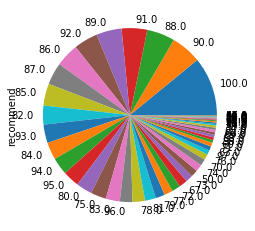

In [127]:
df['recommend'].value_counts().plot(kind= 'pie')

Division into ranges to see a relative amount of data in each relevant range

We will represent this in a bar graph

Text(0, 0.5, 'Recommend')

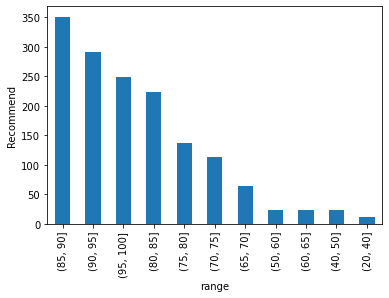

In [364]:
bins_list=[20, 40, 50, 60, 65, 70, 75, 80, 85, 90, 95, 100]
pd.cut(df['recommend'], bins= bins_list).value_counts().plot(kind= 'bar')
plt.xlabel('range', fontsize= 10)
plt.ylabel('Recommend', fontsize= 10)

We can see that the majority of recommends is between 85 - 90 precentage

We can see also that the values are scattered in many ranges

We will show it in a histogram graph also

Text(0, 0.5, 'Recommend')

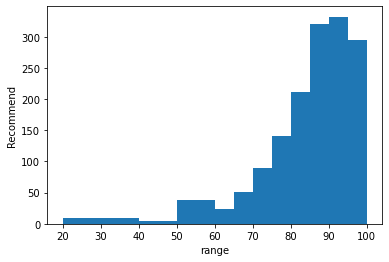

In [365]:
plt.hist(df['recommend'], bins= bins_list)
plt.xlabel('range', fontsize= 10)
plt.ylabel('Recommend', fontsize= 10)

Checking the mean and standard deviation of recommend column

In [130]:
df.recommend.describe()

count    2189.000000
mean       85.084970
std        11.453231
min        20.000000
25%        80.000000
50%        87.000000
75%        92.000000
max       100.000000
Name: recommend, dtype: float64

Checking the count and the probability of receiving glasses that had more than 85% recommendations

In [131]:
df.recommend[df.recommend > 85].count()

1260

In [132]:
df.recommend[df.recommend > 85].count() / df.recommend.count()

0.5756052992233897

We will be able to see again that our recommendations look real without the intervention of the site administrators for the percentage of recommendations that will appear

Checking the distribution of the stars

Text(0, 0.5, 'rating_stars')

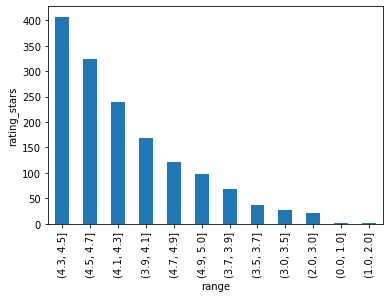

In [366]:
bins_list=[0, 1, 2, 3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5]
pd.cut(df['rating_stars'], bins= bins_list).value_counts().plot(kind= 'bar')
plt.xlabel('range', fontsize= 10)
plt.ylabel('rating_stars', fontsize= 10)

Text(0, 0.5, 'rating_stars')

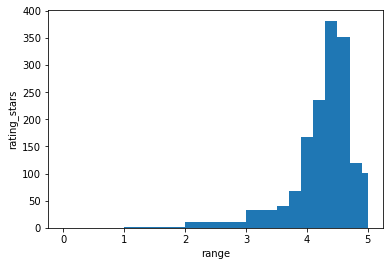

In [367]:
plt.hist(df['rating_stars'], bins= bins_list)
plt.xlabel('range', fontsize= 10)
plt.ylabel('rating_stars', fontsize= 10)

We will check the connection between the rating_stars column and the recommendations column

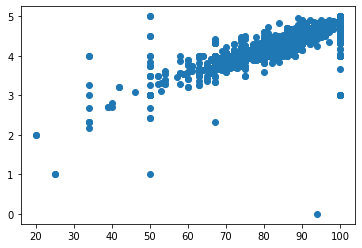

In [135]:
plt.scatter(df.recommend, df.rating_stars)

It can be seen that when there are more recommendations and more stars, then there more linear connection between the two columns

Checking whether there is a connection between the recommendations and the high quality rated for the glasses

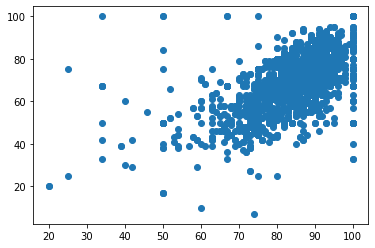

In [136]:
plt.scatter(df.recommend, df.q_high)

Checking whether there is a connection between the fit_true_to_size cloumn and the high quality rated for the glasses

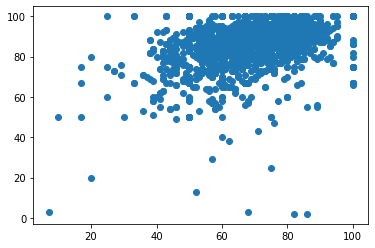

In [137]:
plt.scatter(df.q_high, df.fit_true_to_size)

To check if there is a connection between the price column and other columns, we will convert the price column to numerical numbers

In [305]:
df['price'] = df['price'].str.replace('$', '', regex=True) ### from statology website- remove the "$"
df['price'] = pd.to_numeric(df['price']) ### from stack overFlow website
df['price']

0       12.95
1        9.95
2       15.95
3       15.95
4       19.95
        ...  
1509    27.95
1510    23.95
1511    32.95
1512    35.95
1513    32.95
Name: price, Length: 1514, dtype: float64

We will check the distribution of prices

(array([168.,  73., 177., 412., 349., 382., 483., 157.,  17., 119.]),
 array([ 6.95, 11.25, 15.55, 19.85, 24.15, 28.45, 32.75, 37.05, 41.35,
        45.65, 49.95]),
 <BarContainer object of 10 artists>)

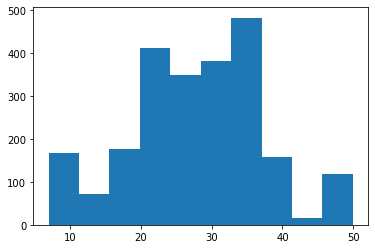

In [139]:
plt.hist(df['price'])

We will check how many children's, men's and women's glasses exist

<AxesSubplot:>

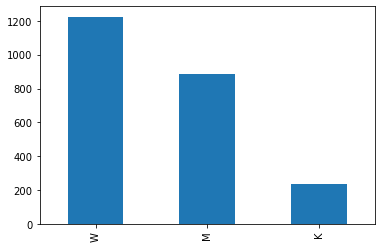

In [140]:
df['gender'].value_counts().plot(kind= 'bar')

We will check the distribution of the high quality

<AxesSubplot:ylabel='q_high'>

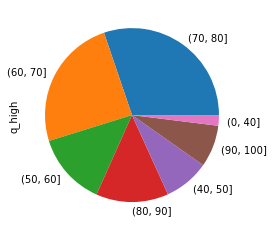

In [141]:
bins_list=[0, 40, 50, 60, 70, 80, 90, 100]
pd.cut(df['q_high'], bins= bins_list).value_counts().plot(kind= 'pie')

# Data cleaning

### Treatment of missing data

Cleaning the data:
1. removing all the rows with duplicate's names.
2. removing all the rows with 0 value or None in recommend and rating stars columns.
 
Completing missing data and making our dataframe ready for the EDA stage‏

#### Finding missing data- Initial review of the data and knowledge of the variables

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2350 non-null   int64  
 1   links                     2350 non-null   object 
 2   name                      2350 non-null   object 
 3   price                     2337 non-null   float64
 4   rating_stars              2340 non-null   float64
 5   gender                    2350 non-null   object 
 6   recommend                 2189 non-null   float64
 7   q_high                    2184 non-null   float64
 8   q_low                     1893 non-null   float64
 9   q_average                 1888 non-null   float64
 10  fit_true_to_size          2188 non-null   float64
 11  fit_tight                 1677 non-null   float64
 12  fit_loose                 1824 non-null   float64
 13  style                     1640 non-null   object 
 14  pd_range

Remove unnamed column

In [300]:
df = df.drop('Unnamed: 0', axis=1)

In [258]:
df.describe(include= 'all')

,links,name,price,rating_stars,gender,recommend,q_high,q_low,q_average,fit_true_to_size,...,rim,shape,material,features,frame_width,lens_width,bridge,temple_length,lens_height,frame_weight
count,2350,2350,2337,2340.000000,2350,2189.000000,2184.000000,1893.000000,1888.000000,2188.000000,...,2334,2334,2334,2349,2349.000000,2272.000000,2338.000000,2344.000000,2342.000000,2349.000000
unique,1622,1622,22,NaN,3,NaN,NaN,NaN,NaN,NaN,...,3,14,13,143,NaN,NaN,NaN,NaN,NaN,NaN
top,https://www.zennioptical.com/p/round-eyeglass-...,Round Glasses 600012,$29.95,NaN,W,NaN,NaN,NaN,NaN,NaN,...,Full Rim,Rectangle,Acetate,['Feature-Custom-engraving'],NaN,NaN,NaN,NaN,NaN,NaN
freq,3,3,382,NaN,1224,NaN,NaN,NaN,NaN,NaN,...,2089,744,572,270,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.069359,NaN,85.084970,70.338828,11.896989,24.252648,86.327697,...,NaN,NaN,NaN,NaN,137.054066,51.225792,18.852438,142.331058,38.793766,17.095785
std,NaN,NaN,NaN,1.094009,NaN,11.453231,14.601867,44.775178,62.076881,11.140907,...,NaN,NaN,NaN,NaN,7.868114,3.072525,2.148338,5.490655,5.826092,6.343632
min,NaN,NaN,NaN,0.000000,NaN,20.000000,7.000000,0.000000,2.000000,2.000000,...,NaN,NaN,NaN,NaN,13.000000,36.000000,12.000000,105.000000,21.000000,6.000000
25%,NaN,NaN,NaN,4.052017,NaN,80.000000,61.000000,5.000000,15.000000,82.000000,...,NaN,NaN,NaN,NaN,134.000000,50.000000,17.000000,140.000000,35.000000,13.000000
50%,NaN,NaN,NaN,4.363636,NaN,87.000000,71.000000,8.000000,21.000000,88.000000,...,NaN,NaN,NaN,NaN,137.000000,51.000000,19.000000,143.000000,39.000000,16.000000
75%,NaN,NaN,NaN,4.554649,NaN,92.000000,79.000000,13.000000,28.000000,93.000000,...,NaN,NaN,NaN,NaN,141.000000,53.000000,20.000000,146.000000,43.000000,20.000000


In [259]:
df.name.duplicated().sum()

728

There are 728 duplicate lines with the same name - we will remove them

In [260]:
df[df.duplicated(['name'])]

,links,name,price,rating_stars,gender,recommend,q_high,q_low,q_average,fit_true_to_size,...,rim,shape,material,features,frame_width,lens_width,bridge,temple_length,lens_height,frame_weight
253,https://www.zennioptical.com/p/acetate-plastic...,Square Glasses 125221,$9.95,4.440926,M,89.0,76.0,6.0,20.0,85.0,...,Full Rim,Square,Other Plastic,"['Feature-Custom-engraving', 'Feature-High-Rx']",139.0,49.0,22.0,148.0,39.0,23.0
255,https://www.zennioptical.com/p/plastic-round-e...,Round Glasses 206825,$19.95,4.509434,M,91.0,66.0,9.0,27.0,90.0,...,Full Rim,Round,TR,['Feature-Custom-engraving'],139.0,50.0,20.0,148.0,43.0,14.0
269,https://www.zennioptical.com/p/mens-full-rim-s...,Rectangle Glasses 162021,$25.95,4.135338,M,82.0,73.0,14.0,14.0,89.0,...,Full Rim,Rectangle,Stainless Steel,['Feature-Nose-Pads'],134.0,51.0,19.0,139.0,32.0,15.0
270,https://www.zennioptical.com/p/tr-round-eyegla...,Round Glasses 125525,$9.95,4.530319,M,91.0,74.0,5.0,21.0,88.0,...,Full Rim,Round,TR,['Feature-Custom-engraving'],133.0,45.0,23.0,141.0,40.0,15.0
271,https://www.zennioptical.com/p/acetate-plastic...,Round Glasses 208425,$12.95,4.554649,M,92.0,77.0,8.0,16.0,91.0,...,Full Rim,Round,TR,['Feature-Custom-engraving'],139.0,48.0,20.0,139.0,43.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,https://www.zennioptical.com/p/non-prescriptio...,Protective Goggles A70180316,$9.95,3.000000,W,50.0,50.0,NaN,50.0,NaN,...,NaN,NaN,NaN,[],149.0,NaN,NaN,126.0,NaN,30.0
2344,https://www.zennioptical.com/p/aviator-sunglas...,Premium Aviator Sunglasses 1151216,$45.95,0.000000,W,NaN,NaN,NaN,NaN,NaN,...,Full Rim,Aviator,Mixed Materials,[],141.0,55.0,17.0,147.0,46.0,17.0
2345,https://www.zennioptical.com/p/santo-domingo-a...,Santo Domingo 99102821,$39.95,0.000000,W,NaN,NaN,NaN,NaN,NaN,...,Full Rim,Aviator,TR,['Feature-Spring-Hinges'],144.0,59.0,18.0,146.0,50.0,14.0
2346,https://www.zennioptical.com/p/acetate-square-...,Premium Square Sunglasses 112824,$32.95,4.466667,W,80.0,85.0,15.0,NaN,87.0,...,Full Rim,Square,Acetate,"['Feature-Spring-Hinges', 'Feature-Custom-engr...",139.0,54.0,22.0,147.0,45.0,22.0


In [261]:
df= df.drop_duplicates(subset= ['name'])

#### Finding missing data

When we have a 0 star rating or NaN we will get a mostly empty row so we will remove it

In [262]:
df['rating_stars'] = df['rating_stars'].fillna(0, inplace = False)
df= df[(df.rating_stars != 0) & (df.rating_stars != None)]  ##stack overflow
df

,links,name,price,rating_stars,gender,recommend,q_high,q_low,q_average,fit_true_to_size,...,rim,shape,material,features,frame_width,lens_width,bridge,temple_length,lens_height,frame_weight
0,https://www.zennioptical.com/p/womens-tr-oval-...,Oval Glasses 127339,$12.95,4.434156,K,88.0,59.0,3.0,29.0,92.0,...,Full Rim,Oval,Other Plastic,"['Feature-Custom-engraving', 'Feature-Lightwei...",129.0,50.0,17.0,142.0,30.0,8.0
1,https://www.zennioptical.com/p/girls-tr-rectan...,Kids' Rectangle Glasses 124817,$9.95,4.473333,K,90.0,75.0,5.0,21.0,88.0,...,Full Rim,Rectangle,Other Plastic,"['Feature-Custom-engraving', 'Feature-Spring-H...",121.0,45.0,15.0,130.0,33.0,17.0
2,https://www.zennioptical.com/p/kids-plastic-sq...,Kids' Square Glasses 2011921,$15.95,4.567308,K,92.0,70.0,5.0,25.0,90.0,...,Full Rim,Square,TR,"['Feature-Custom-engraving', 'Feature-Spring-H...",129.0,47.0,18.0,131.0,36.0,14.0
3,https://www.zennioptical.com/p/tr-round-eyegla...,Glow-in-the-Dark Round Glasses 2029150,$15.95,4.361111,K,87.0,46.0,7.0,46.0,75.0,...,Full Rim,Round,TR,"['Feature-Narrow-Fit', 'Feature-Custom-engravi...",129.0,48.0,19.0,138.0,40.0,9.0
4,https://www.zennioptical.com/p/kids-acetate-ro...,Kids' Round Glasses 4415323,$19.95,4.510000,K,92.0,76.0,3.0,22.0,89.0,...,Full Rim,Round,Acetate,"['Feature-Narrow-Fit', 'Feature-Custom-engravi...",127.0,44.0,20.0,144.0,36.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,https://www.zennioptical.com/p/womens-cat-eye-...,Cat-Eye Glasses 7835121,$27.95,5.000000,W,50.0,100.0,NaN,NaN,100.0,...,Full Rim,Cat-Eye,Mixed Materials,['Feature-Spring-Hinges'],139.0,52.0,18.0,145.0,39.0,20.0
2266,https://www.zennioptical.com/p/womens-tr-cat-e...,Cat-Eye Glasses 2041812,$23.95,5.000000,W,100.0,100.0,NaN,NaN,100.0,...,Full Rim,Cat-Eye,TR,['Feature-Spring-Hinges'],137.0,53.0,15.0,146.0,36.0,19.0
2274,https://www.zennioptical.com/p/womens-acetate-...,Geometric Glasses 4458525,$32.95,5.000000,W,100.0,100.0,NaN,NaN,100.0,...,Full Rim,Geometric,Acetate,[],146.0,53.0,18.0,149.0,41.0,27.0
2276,https://www.zennioptical.com/p/womens-rectangl...,Rectangle Glasses 7825412,$35.95,4.000000,W,64.0,64.0,18.0,18.0,64.0,...,Full Rim,Rectangle,Mixed Materials,['Feature-Lightweight'],138.0,53.0,18.0,140.0,36.0,12.0


Also we need to do the same to recommend column

In [307]:
df['recommend'] = df['recommend'].fillna(0, inplace = False)
df= df[(df.recommend != 0) & (df.recommend != None)]  ##stack overflow

In [266]:
df.shape

(1514, 30)

In [267]:
df.describe()

,Unnamed: 0,rating_stars,recommend,q_high,q_low,q_average,fit_true_to_size,fit_tight,fit_loose,pd_range,prescription_range_start,prescription_range_end,frame_width,lens_width,bridge,temple_length,lens_height,frame_weight
count,1514.000000,1514.000000,1514.000000,1499.000000,1295.000000,1279.000000,1503.000000,1162.000000,1256.000000,1505.000000,1505.000000,1505.000000,1513.000000,1465.000000,1508.000000,1510.000000,1509.000000,1513.000000
mean,897.381110,4.346850,85.379789,70.696464,10.923552,22.590305,86.323353,9.415663,10.113057,56.855814,-15.699169,8.891030,136.766689,51.316724,18.704907,141.810596,38.500994,17.270985
std,568.802523,0.415296,11.600437,14.642443,9.413703,11.154040,11.674937,9.456744,9.639062,5.738292,5.948673,4.148517,8.258419,3.100220,2.137863,5.603998,6.008242,6.259537
min,0.000000,1.000000,20.000000,7.000000,0.000000,2.000000,2.000000,0.000000,0.000000,35.000000,-20.000000,0.000000,13.000000,36.000000,12.000000,117.000000,21.000000,6.000000
25%,407.500000,4.163867,80.000000,62.000000,5.000000,15.000000,82.000000,4.000000,4.000000,54.000000,-20.000000,5.000000,134.000000,50.000000,17.000000,139.000000,34.000000,13.000000
50%,842.000000,4.405506,88.000000,71.000000,8.000000,21.000000,88.000000,6.000000,7.000000,57.000000,-20.000000,12.000000,137.000000,51.000000,18.000000,142.000000,39.000000,17.000000
75%,1396.750000,4.594202,93.000000,80.000000,13.000000,28.000000,94.000000,11.000000,12.000000,61.000000,-8.000000,12.000000,141.000000,53.000000,20.000000,145.000000,43.000000,20.000000
max,2300.000000,5.000000,100.000000,100.000000,95.000000,100.000000,100.000000,100.000000,71.000000,75.000000,-3.000000,12.000000,180.000000,63.000000,29.000000,165.000000,56.000000,116.000000


We are left with 1514 rows, and the outliers values in quality disappeared

We will fill the columns below that have a missing value with 0 because that means they were not graded

In [268]:
df.q_high= df.q_high.fillna(0)
df.q_low= df.q_low.fillna(0)
df.q_average= df.q_average.fillna(0)
df.fit_true_to_size= df.fit_true_to_size.fillna(0)
df.fit_loose= df.fit_loose.fillna(0)
df.fit_tight= df.fit_tight.fillna(0)
df.recommend= df.recommend.fillna(0)

We will fill in the price column the missing values according to the common value

In [269]:
df['price']= df.price.fillna(df.price.mode()[0]) ##מילוי לפי ערך שכיח

We will fill the missing values in the style column according to the value above since it is likely that a child's/man's/woman's glasses will be similar in style according to the other glasses

In [270]:
df['style']= df['style'].fillna(method= 'ffill')

Filling numerical columns according to the average value

In [271]:
df['pd_range']= df.pd_range.fillna(df.pd_range.mean()) 
df['prescription_range_start']= df.prescription_range_start.fillna(df.prescription_range_start.mean())
df['prescription_range_end']= df.prescription_range_end.fillna(df.prescription_range_end.mean())
df['frame_width']= df.frame_width.fillna(df.frame_width.mean())
df['lens_width']= df.lens_width.fillna(df.lens_width.mean())
df['bridge']= df.bridge.fillna(df.bridge.mean())
df['temple_length']= df.temple_length.fillna(df.temple_length.mean())
df['frame_weight']= df.frame_weight.fillna(df.frame_weight.mean())
df['lens_height']= df.lens_height.fillna(df.lens_height.mean())

We will examine the size column

In [272]:
df['size'].value_counts()

Medium              543
Large               513
Small               277
Kids Medium          71
Kids Large           42
Kids Small           28
Extra Small          27
Kids Extra Small      4
Name: size, dtype: int64

We can turn the size column and other object columns into categorical columns

After that, we will fill the columns according to the value above or in the case of the readers column and the progressive_bifocal column which we will fill with "2" which represents to us No

In [273]:
##
replace_map_size= {'Extra Small': 1, 'Small':2 , 'Medium':3, 'Large':4, 'Kids Extra Small':5,'Kids Small':6, 'Kids Medium':7, 'Kids Large':8}
df['size']= df['size'].astype('category')
df.replace(replace_map_size, inplace= True)
##
replace_map_readers_bifocal= {'Yes':1, 'No': 2}
df['readers']= df['readers'].astype('category')
df['progressive_bifocal']= df['progressive_bifocal'].astype('category')
df.replace(replace_map_readers_bifocal, inplace= True)
##
replace_map_rim= {'Full Rim':1, 'Half Rim': 2, 'Rimless':3 }
df['rim']= df['rim'].astype('category')
df.replace(replace_map_rim, inplace= True)
##
replace_map_material= {'Acetate':1, 'TR': 2, 'Stainless Steel':3 , 'Mixed Materials':4, 'Other Plastic':5, 'Titanium':6, 'Other Metal':7, 'Memory Titanium':8, '\nLightweight\n ':9, '\nNose Pads\n':10, 'Ultem':11, '\nPre-Teen Boys Glasses':12, '\nPre-Teen Girls Glasses':13}
df['material']= df['material'].astype('category')
df.replace(replace_map_material, inplace= True)
##
replace_map_shape= {'Rectangle':9, 'Square': 10, 'Round':11, 'Cat-Eye':12, 'Aviator':13, 'Oval':14, 'Browline':15, 'Geometric':16 }
df['shape']= df['shape'].astype('category')
df.replace(replace_map_shape, inplace= True)
###


In [274]:
df['size']= df['size'].fillna(method= 'ffill')
df['readers']= df['readers'].fillna(2) ## No
df['progressive_bifocal']= df['progressive_bifocal'].fillna(2) ## No
df['rim']= df['rim'].fillna(method= 'ffill')
df['material']= df['material'].fillna(method= 'ffill')
df['features']= df['features'].fillna(method= 'ffill')
df['shape']= df['shape'].fillna(method= 'ffill')

# Visualization and EDA

We presented the data using various graphs and tables,
We investigated the data and the connections between them.
We performed statistical tests such as the chi-square test and the Pearson correlation coefficient.

We got to know our dataframe closely and began to draw conclusions about the factors and columns that influence buyer recommendations.‏

### One-dimensional visualizations

###### Cross-tabulation

In [276]:
df[['recommend', 'q_high']].head()

,recommend,q_high
0,88,59.0
1,90,75.0
2,92,70.0
3,87,46.0
4,92,76.0


In [277]:
df3= df.copy()

In [278]:
bins_list_1=[0, 40, 50, 60, 70, 80, 90, 100]
df3['q_high']= pd.cut(df3['q_high'], bins= bins_list_1)
bins_list_2=[20, 40, 50, 60, 65, 70, 75, 80, 85, 90, 95, 100]
df3['recommend']= pd.cut(df3['recommend'], bins= bins_list_2)
ct1= pd.crosstab(df3['recommend'], df3['q_high'])
ct1

q_high,"(0, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
recommend,,,,,,,
"(20, 40]",4,2,1,2,0,0,1
"(40, 50]",4,13,1,0,1,1,2
"(50, 60]",4,8,8,1,1,0,0
"(60, 65]",2,6,8,7,1,0,0
"(65, 70]",2,22,18,15,2,0,2
"(70, 75]",7,32,31,27,13,1,1
"(75, 80]",1,15,40,55,24,2,0
"(80, 85]",1,7,36,95,66,18,1
"(85, 90]",0,9,32,94,166,47,3


In [279]:
ct2= pd.crosstab(df3['recommend'], df3['q_high'], normalize='index')
ct2

q_high,"(0, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
recommend,,,,,,,
"(20, 40]",0.400000,0.200000,0.100000,0.200000,0.000000,0.000000,0.100000
"(40, 50]",0.181818,0.590909,0.045455,0.000000,0.045455,0.045455,0.090909
"(50, 60]",0.181818,0.363636,0.363636,0.045455,0.045455,0.000000,0.000000
"(60, 65]",0.083333,0.250000,0.333333,0.291667,0.041667,0.000000,0.000000
"(65, 70]",0.032787,0.360656,0.295082,0.245902,0.032787,0.000000,0.032787
"(70, 75]",0.062500,0.285714,0.276786,0.241071,0.116071,0.008929,0.008929
"(75, 80]",0.007299,0.109489,0.291971,0.401460,0.175182,0.014599,0.000000
"(80, 85]",0.004464,0.031250,0.160714,0.424107,0.294643,0.080357,0.004464
"(85, 90]",0.000000,0.025641,0.091168,0.267806,0.472934,0.133903,0.008547


Text(0, 0.5, 'High quality')

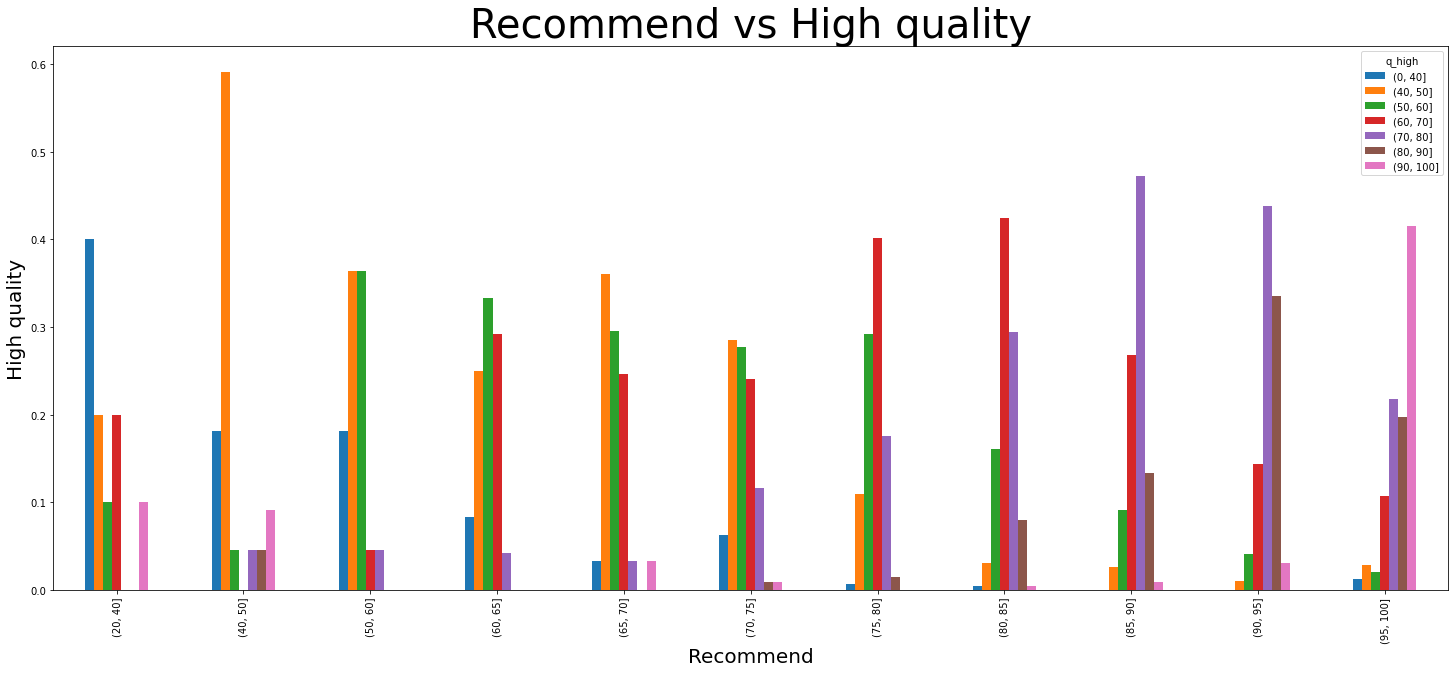

In [280]:
ct2.plot(kind='bar', figsize= (25,10))
plt.title('Recommend vs High quality', fontsize= 40)
plt.xlabel('Recommend', fontsize= 20)
plt.ylabel('High quality', fontsize= 20)

It can be seen that there is a direct connection between the recommendations and the high quality. For example: you can see that the dominant column in the range between 95-100 in the recommendations is the pink column - which signifies a high quality rating in the range of 90-100

In [281]:
ct3= pd.crosstab(df3['readers'], df3['progressive_bifocal'])
ct3

progressive_bifocal,1.0,2.0
readers,,
1.0,714,81
2.0,510,209


Text(0, 0.5, 'progressive_bifocal')

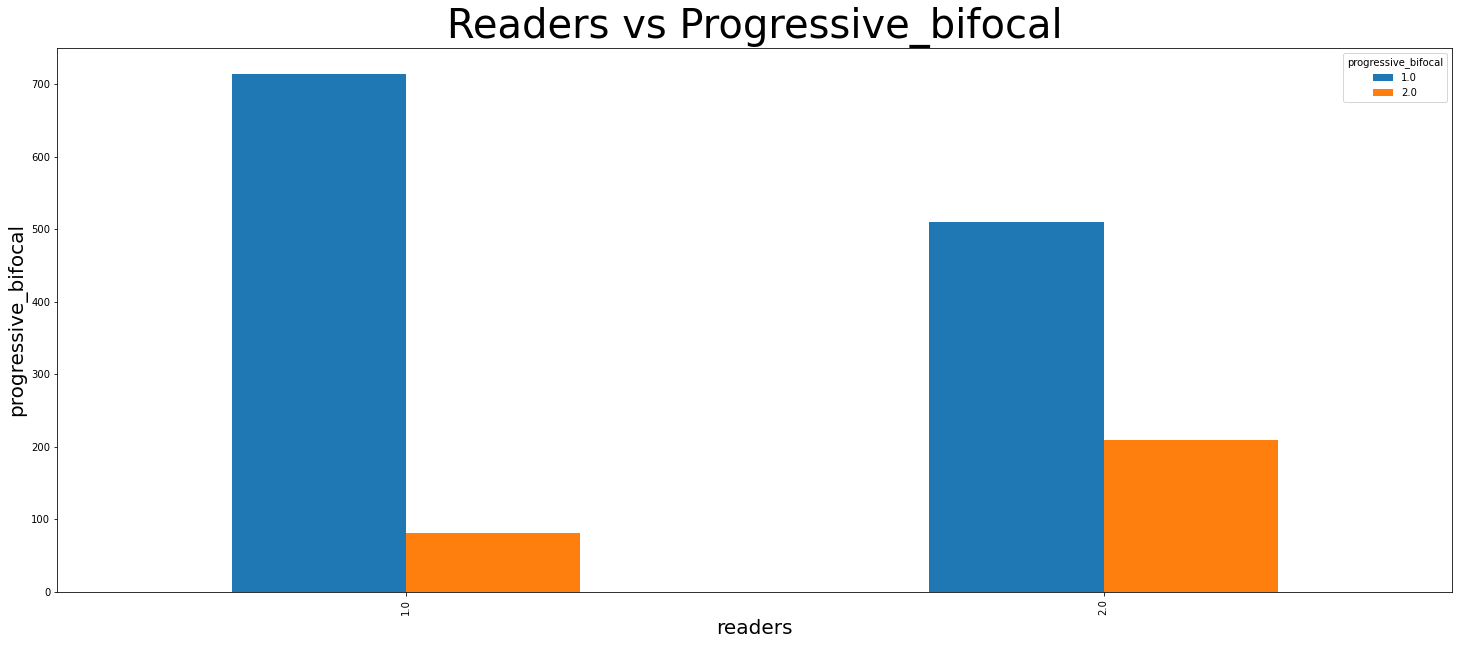

In [282]:
ct3.plot(kind='bar', figsize= (25,10))
plt.title('Readers vs Progressive_bifocal', fontsize= 40)
plt.xlabel('readers', fontsize= 20)
plt.ylabel('progressive_bifocal', fontsize= 20)

In [283]:
bins_list=[0, 1, 2, 3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5]
df3['rating_stars']= pd.cut(df3['rating_stars'], bins= bins_list)

In [284]:
ct5= pd.crosstab(df3['rating_stars'], df3['recommend'], normalize='index')
ct5

recommend,"(20, 40]","(40, 50]","(50, 60]","(60, 65]","(65, 70]","(70, 75]","(75, 80]","(80, 85]","(85, 90]","(90, 95]","(95, 100]"
rating_stars,,,,,,,,,,,
"(0.0, 1.0]",0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(2.0, 3.0]",0.380952,0.428571,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857
"(3.0, 3.5]",0.037037,0.185185,0.407407,0.222222,0.111111,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000
"(3.5, 3.7]",0.000000,0.000000,0.216216,0.243243,0.432432,0.054054,0.027027,0.000000,0.000000,0.000000,0.027027
"(3.7, 3.9]",0.000000,0.043478,0.057971,0.057971,0.246377,0.521739,0.043478,0.028986,0.000000,0.000000,0.000000
"(3.9, 4.1]",0.005952,0.011905,0.005952,0.029762,0.113095,0.309524,0.327381,0.095238,0.035714,0.000000,0.065476
"(4.1, 4.3]",0.000000,0.000000,0.000000,0.000000,0.008368,0.071130,0.284519,0.502092,0.125523,0.004184,0.004184
"(4.3, 4.5]",0.000000,0.002457,0.000000,0.000000,0.014742,0.012285,0.024570,0.199017,0.572482,0.132678,0.041769
"(4.5, 4.7]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003086,0.009259,0.228395,0.614198,0.145062


Text(0, 0.5, 'Recommend')

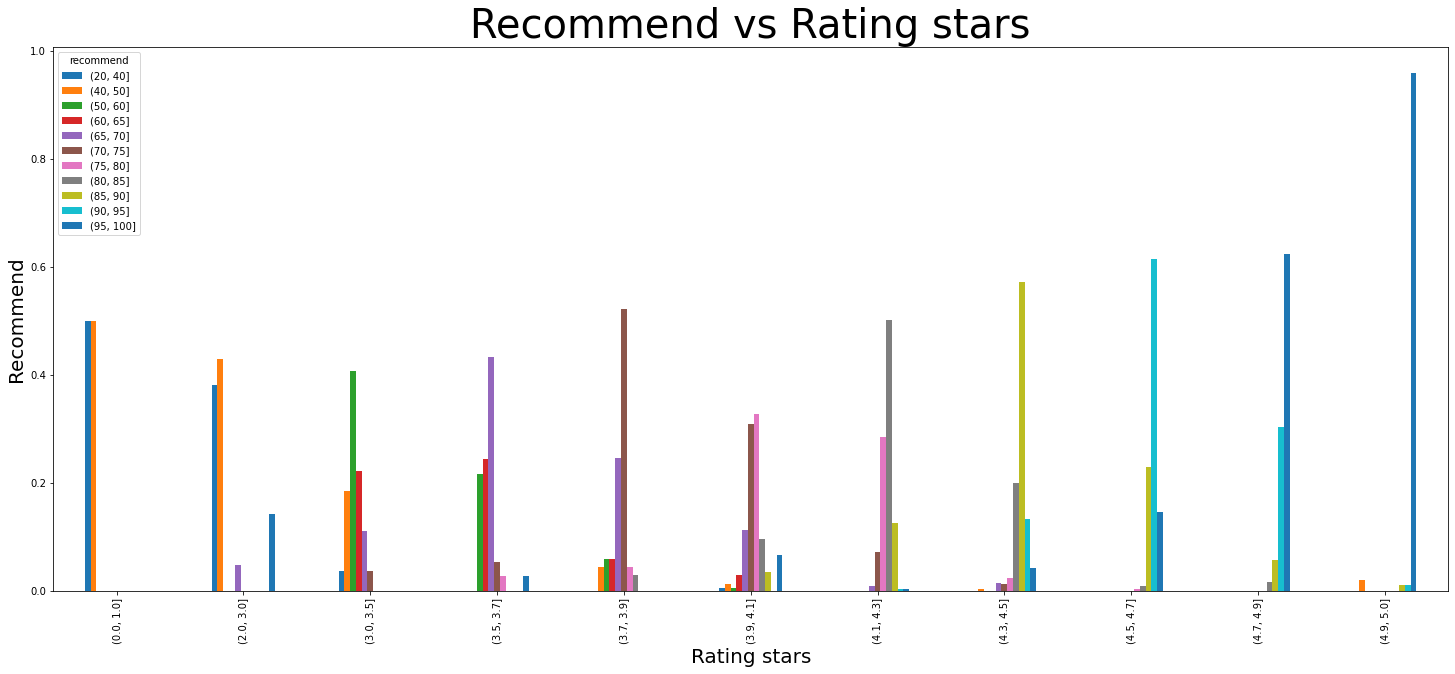

In [285]:
ct5.plot(kind='bar', figsize= (25,10))
plt.title('Recommend vs Rating stars', fontsize= 40)
plt.xlabel('Rating stars', fontsize= 20)
plt.ylabel('Recommend', fontsize= 20)

It can be seen that there is a direct connection between the recommendations and the stars. For example: we can see that the dominant column in the range between 4.9-5.0 stars is the blue column - which signifies a high recommendation rating in the range of 95-100

We will change whis to increase the icr and to have fewer outliers

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='recommend'>

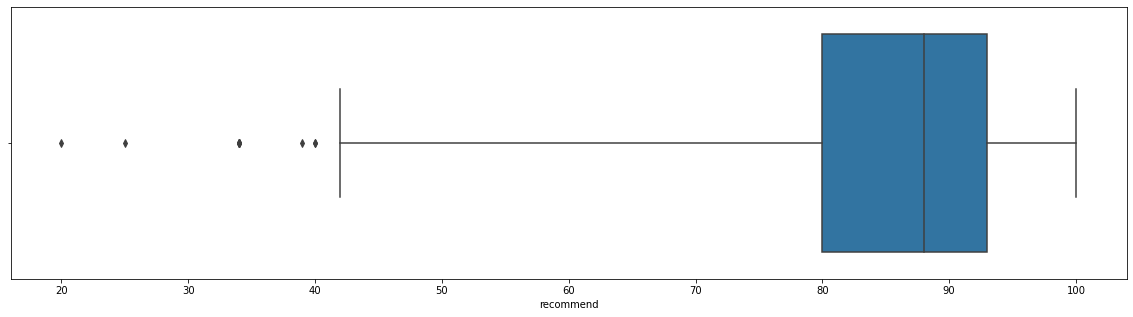

In [286]:
fig= plt.figure(figsize= (20,5))
sns.boxplot(df.recommend, whis= 3)

We would like to see if there is a connection between gender and high quality

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='q_high'>

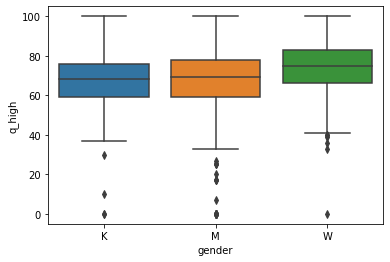

In [287]:
sns.boxplot(df.gender, df.q_high)

We would like to see if there is a connection between reading glasses and recommendations

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='readers', ylabel='recommend'>

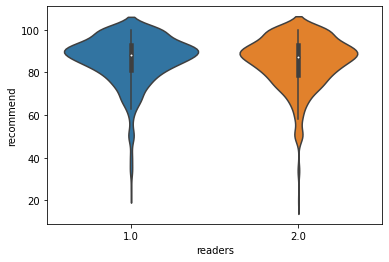

In [288]:
sns.violinplot(df.readers, df.recommend)

We will note that there is no connection

### Two-dimensional visualizations

#### Let's check the Pearson coefficient

In [368]:
from scipy.stats import pearsonr

## from geeks for geeks

list1 = df['recommend']
list2 = df['fit_true_to_size']
list3 = df['q_high']
list4 = df['rating_stars']
list5 = df['price']

# pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

# pearsonr()
corr, _ = pearsonr(list1, list3)
print('Pearsons correlation: %.3f' % corr)

# pearsonr()
corr, _ = pearsonr(list1, list4)
print('Pearsons correlation: %.3f' % corr)


# pearsonr()
corr, _ = pearsonr(list1, list5)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.446
Pearsons correlation: 0.588
Pearsons correlation: 0.851
Pearsons correlation: -0.017


There is a moderate positive correlation between recommendations and fit_true_to_size, and between recommendations and high quality. 

Additionally, there is a strong positive correlation between recommendations and rating_stars.

To our surprise there is a negative correlation between price and recommendations

#### chi2 function

In [290]:
from scipy.stats import chi2_contingency

In [291]:
ct6= pd.crosstab(df3['gender'], df3['recommend'], normalize='index')
ct6

recommend,"(20, 40]","(40, 50]","(50, 60]","(60, 65]","(65, 70]","(70, 75]","(75, 80]","(80, 85]","(85, 90]","(90, 95]","(95, 100]"
gender,,,,,,,,,,,
K,0.017391,0.013043,0.017391,0.017391,0.056522,0.091304,0.100000,0.156522,0.217391,0.195652,0.117391
M,0.006693,0.018742,0.016064,0.018742,0.042838,0.097724,0.115127,0.182062,0.219545,0.153949,0.128514
W,0.003731,0.011194,0.014925,0.011194,0.035448,0.035448,0.054104,0.097015,0.255597,0.246269,0.235075


In [292]:
chi2_contingency(ct6)

(0.17889781497127316,
 1.0,
 20,
 array([[0.00927203, 0.01432638, 0.01612698, 0.01577566, 0.04493584,
         0.07482545, 0.08974388, 0.14519941, 0.23084439, 0.19862332,
         0.16032666],
        [0.00927203, 0.01432638, 0.01612698, 0.01577566, 0.04493584,
         0.07482545, 0.08974388, 0.14519941, 0.23084439, 0.19862332,
         0.16032666],
        [0.00927203, 0.01432638, 0.01612698, 0.01577566, 0.04493584,
         0.07482545, 0.08974388, 0.14519941, 0.23084439, 0.19862332,
         0.16032666]]))

We got a value greater than 0.05 and therefore there is no dependence between the two variables

In [369]:
ct6= pd.crosstab(df3['price'], df3['recommend'], normalize='index')
ct6

recommend,"(20, 40]","(40, 50]","(50, 60]","(60, 65]","(65, 70]","(70, 75]","(75, 80]","(80, 85]","(85, 90]","(90, 95]","(95, 100]"
price,,,,,,,,,,,
$12.95,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.120000,0.200000,0.320000,0.280000,0.040000
$15.95,0.000000,0.000000,0.008264,0.000000,0.000000,0.033058,0.157025,0.132231,0.330579,0.247934,0.090909
$19.95,0.012048,0.018072,0.006024,0.018072,0.060241,0.126506,0.096386,0.174699,0.168675,0.216867,0.102410
$21.95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
$23.95,0.008929,0.017857,0.017857,0.008929,0.062500,0.080357,0.116071,0.178571,0.205357,0.160714,0.142857
$25.95,0.007463,0.014925,0.000000,0.022388,0.029851,0.097015,0.089552,0.208955,0.201493,0.164179,0.164179
$27.95,0.000000,0.023256,0.011628,0.000000,0.046512,0.081395,0.093023,0.174419,0.290698,0.186047,0.093023
$29.95,0.004237,0.012712,0.029661,0.012712,0.038136,0.063559,0.072034,0.161017,0.258475,0.186441,0.161017
$32.95,0.007519,0.015038,0.030075,0.045113,0.075188,0.075188,0.090226,0.127820,0.195489,0.157895,0.180451


In [370]:
chi2_contingency(ct6)

(17.823756260231924,
 1.0,
 190,
 array([[0.00764598, 0.01361845, 0.00816197, 0.00850395, 0.02622707,
         0.07727821, 0.06398333, 0.0961212 , 0.18052655, 0.17291831,
         0.34501499],
        [0.00764598, 0.01361845, 0.00816197, 0.00850395, 0.02622707,
         0.07727821, 0.06398333, 0.0961212 , 0.18052655, 0.17291831,
         0.34501499],
        [0.00764598, 0.01361845, 0.00816197, 0.00850395, 0.02622707,
         0.07727821, 0.06398333, 0.0961212 , 0.18052655, 0.17291831,
         0.34501499],
        [0.00764598, 0.01361845, 0.00816197, 0.00850395, 0.02622707,
         0.07727821, 0.06398333, 0.0961212 , 0.18052655, 0.17291831,
         0.34501499],
        [0.00764598, 0.01361845, 0.00816197, 0.00850395, 0.02622707,
         0.07727821, 0.06398333, 0.0961212 , 0.18052655, 0.17291831,
         0.34501499],
        [0.00764598, 0.01361845, 0.00816197, 0.00850395, 0.02622707,
         0.07727821, 0.06398333, 0.0961212 , 0.18052655, 0.17291831,
         0.34501499],
       

We got a value greater than 0.05 and therefore there is no dependence between the two variables

### Multidimensional visualizations

#### Line plot

<AxesSubplot:xlabel='recommend'>

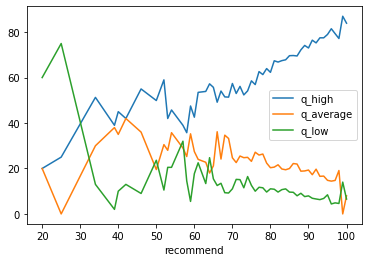

In [293]:
gb= df.groupby(['recommend']).mean()[['q_high', 'q_average', 'q_low']]
gb.plot()

It can be seen that there is a connection between the recommendations and the quality

<AxesSubplot:xlabel='recommend'>

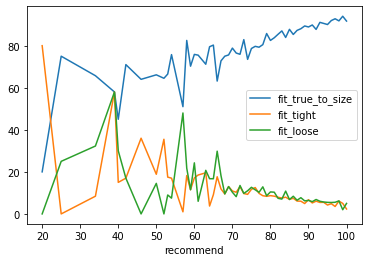

In [294]:
gb1= df.groupby(['recommend']).mean()[['fit_true_to_size', 'fit_tight', 'fit_loose']]
gb1.plot()

Only from the middle of the range there seems to be a direct connection, before that, it is not possible to see

#### Scatter plot

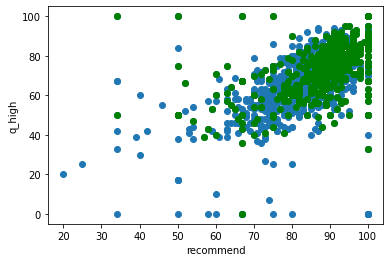

In [295]:
fig= plt.figure()
ax= plt.axes()
ax.scatter(df.recommend, df.q_high)
plt.xlabel('recommend')
plt.ylabel('q_high')
ax.scatter(df.recommend[df.gender == 'W'], df.q_high[df.gender== 'W'], c='green')
plt.show()

It can be seen that there are outlires, at the same time there is a connection between the two variables

#### Scatter 3D

In [296]:
from mpl_toolkits.mplot3d import Axes3D

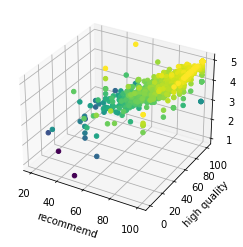

In [297]:
ax= plt.axes(projection= '3d')

xdata= df.recommend
ydata= df.q_high
zdata= df.rating_stars

plt.xlabel('recommemd')
plt.ylabel('high quality')

ax.scatter3D(xdata, ydata, zdata, c= zdata, depthshade= False)

It can be clearly seen that there is a strong connection between the three variables, however there are outliers

#### heat map

In [207]:
from scipy import stats

In [208]:
from dython.nominal import associations

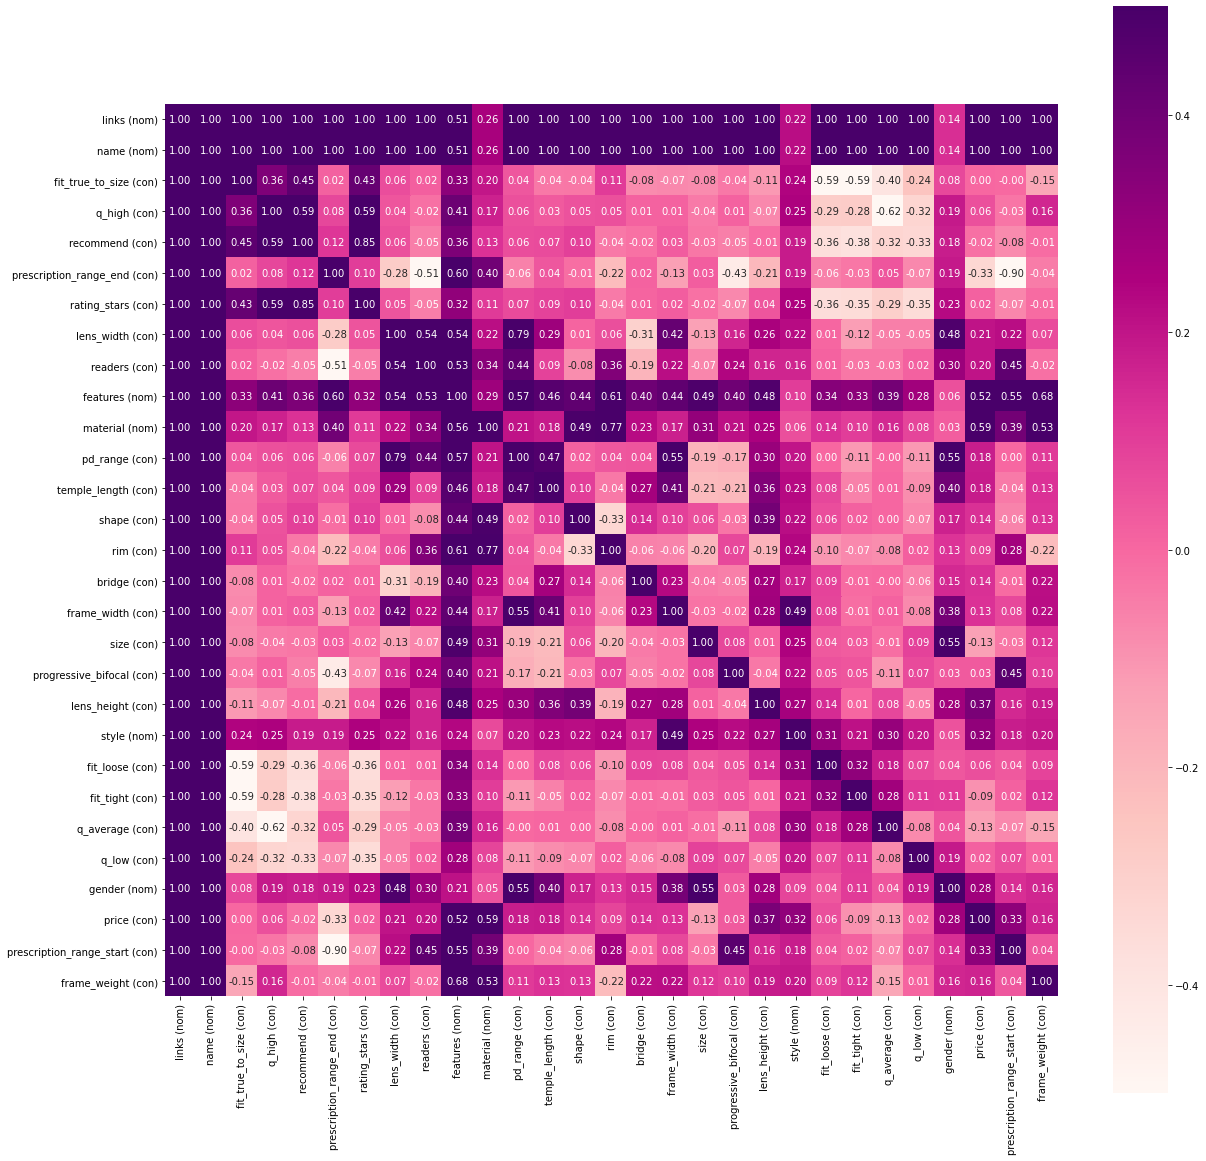

In [361]:
ax = associations(df, nom_nom_assoc= 'theil', figsize = (20, 20), cmap='RdPu', mark_columns = True, clustering=True
                 , vmin= -0.5, vmax= 0.5)
plt.show()
#from shakedzy website

In the matrix we can see the connections between each column in our dataframe.

Purple = closer to 1 -- > positive correlation, Pink = closer to -1 -- > negative correlation

# Machine Learning

## Linear regression

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import MinMaxScaler

Split the data for the next step 

In [375]:
TRAINING_FEATURES = ['q_high', 'q_average', 'q_low', 'rating_stars', 'fit_true_to_size', 'fit_tight', 'fit_loose', 'price']
TARGET_FEATURE = 'recommend'
X = df[TRAINING_FEATURES]
y = df[TARGET_FEATURE]

In [376]:
X.head()

,q_high,q_average,q_low,rating_stars,fit_true_to_size,fit_tight,fit_loose,price
0,59.0,29.0,3.0,4.434156,92.0,3.0,3.0,12.95
1,75.0,21.0,5.0,4.473333,88.0,10.0,10.0,9.95
2,70.0,25.0,5.0,4.567308,90.0,5.0,5.0,15.95
3,46.0,46.0,7.0,4.361111,75.0,7.0,7.0,15.95
4,76.0,22.0,3.0,4.510000,89.0,6.0,6.0,19.95


In [377]:
y.head()

0    88
1    90
2    92
3    87
4    92
Name: recommend, dtype: int64

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

print("\nTarget distribution in original dataset:\n{}".format(y.value_counts()))
print("\nTarget distribution in the training set:\n{}\n".format(y_train.value_counts()))
print("Target distribution in the test set:\n{}".format(y_test.value_counts()))

Initial amount of samples: #1514
Number of training samples: #1211
Number of test samples: #303

Target distribution in original dataset:
100    179
90      86
88      74
91      73
89      71
92      70
86      62
87      58
85      55
93      55
82      50
84      50
94      48
95      46
75      44
96      44
80      42
83      39
78      34
81      30
67      27
79      27
72      23
77      22
50      21
74      20
70      20
73      16
97      15
76      13
63      11
71      10
98      10
65       7
60       7
34       7
68       6
66       6
69       5
54       4
58       4
59       4
64       4
53       2
52       2
40       2
61       2
57       1
25       1
46       1
42       1
39       1
99       1
20       1
Name: recommend, dtype: int64

Target distribution in the training set:
100    147
90      66
88      63
89      59
91      52
92      51
87      48
86      47
85      43
93      43
94      40
84      40
82      39
95      38
75      37
80      35
96      33
83      2

Fitting the data

In [379]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

print(f'intercept: {regressor.intercept_}')

print(f'coef: {regressor.coef_}')

feature_names = X.columns
print(f'Features: {feature_names}')

intercept: -10.285994836546152
coef: [ 4.70474563e-02 -3.31240989e-02 -2.25950002e-02  2.12430171e+01
  3.53604958e-02 -6.47849625e-02 -2.10473793e-02 -5.98221613e-02]
Features: Index(['q_high', 'q_average', 'q_low', 'rating_stars', 'fit_true_to_size',
       'fit_tight', 'fit_loose', 'price'],
      dtype='object')


In [380]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                  Coefficient value
q_high                     0.047047
q_average                 -0.033124
q_low                     -0.022595
rating_stars              21.243017
fit_true_to_size           0.035360
fit_tight                 -0.064785
fit_loose                 -0.021047
price                     -0.059822


Prediction

In [381]:
y_pred = regressor.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

      Actual   Predicted
51        92  100.154137
168       96   95.846632
1467     100   71.408528
926       84   85.938417
422       85   85.080091
...      ...         ...
1167      79   80.437434
111       58   74.276329
1290     100  102.617501
793       90   88.079007
998       90   89.361617

[303 rows x 2 columns]


Mean absolute error, 
Mean squared error, 
Root mean squared error, 
R²

In [342]:
mae = mean_absolute_error(y_test, y_pred) ##mean_absolute_error
mse = mean_squared_error(y_test, y_pred) ##mean_squared_error
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean absolute error: {mae:.2f}') 
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print('R²:', r2)

Mean absolute error: 3.49
Mean squared error: 35.25
Root mean squared error: 5.94
R²: 0.7077441939638969


In [343]:
regressor.score(X_train, y_train)

0.7517878203250323

Linear plot

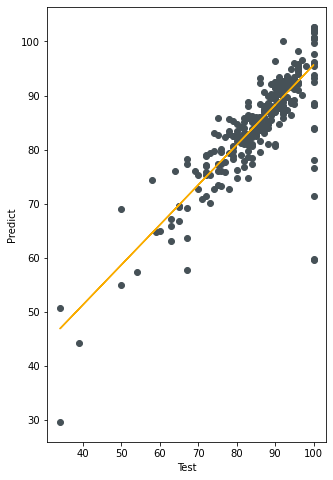

In [344]:
fig = plt.figure(figsize = (5, 8))
plt.scatter(x = y_test, y = y_pred, color='#465157')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test+b, color='#f9ac00')

plt.xlabel('Test')
plt.ylabel('Predict')
plt.show()


# souce : https://data36.com/linear-regression-in-python-numpy-polyfit/

#### MinMaxScaler

Lets see if we can improve the predict with using MinMaxScaler

In [345]:
###help from chatgpt

# Separate the input variables (features) and target variable (dependent variable)
X = df[TRAINING_FEATURES]X = df[TRAINING_FEATURES]
y = df[TARGET_FEATURE]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input variables using MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Create an instance of the LinearRegression class and fit it to the normalized input variables and target variable
regressor = LinearRegression()
regressor.fit(X_train_normalized, y_train)

# Make predictions on the test data
predictions = regressor.predict(X_test_normalized)

#dataframe
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)
y = df[TARGET_FEATURE]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input variables using MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Create an instance of the LinearRegression class and fit it to the normalized input variables and target variable
regressor = LinearRegression()
regressor.fit(X_train_normalized, y_train)

# Make predictions on the test data
predictions = regressor.predict(X_test_normalized)

#dataframe
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)

      Actual   Predicted
51        92  100.035683
168       96   95.599240
1467     100   71.283624
926       84   85.795527
422       85   84.849388
...      ...         ...
1018      90   89.737246
1343     100   86.336493
209       76   77.387349
610       72   75.165934
527       71   71.223321

[455 rows x 2 columns]


In [346]:
mae = mean_absolute_error(y_test, predictions) ##mean_absolute_error
mse = mean_squared_error(y_test, predictions) ##mean_squared_error
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'Mean absolute error: {mae:.2f}') 
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print('R²:', r2)

Mean absolute error: 3.61
Mean squared error: 34.09
Root mean squared error: 5.84
R²: 0.7344226003536515


We got a small but not significant improvement to our model, after using minmaxscaler

##### from :
Mean absolute error: 3.49

Mean squared error: 35.25

Root mean squared error: 5.94

R²: 0.7077441939638969

##### to:
Mean absolute error: 3.61

Mean squared error: 34.09

Root mean squared error: 5.84

R²: 0.7344226003536515

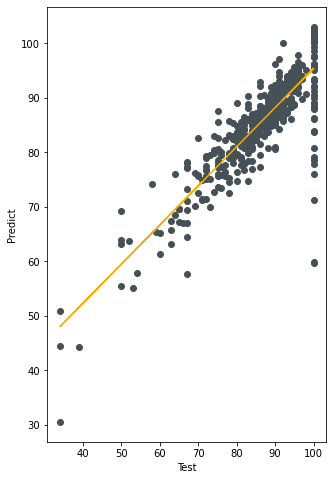

In [347]:
fig = plt.figure(figsize = (5, 8))
plt.scatter(x = y_test, y = predictions, color='#465157')
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m*y_test+b, color='#f9ac00')

plt.xlabel('Test')
plt.ylabel('Predict')
plt.show()


# souce : https://data36.com/linear-regression-in-python-numpy-polyfit/

###### Lets check if price is a factor influencing buyer recommendations- remove it from the training features

In [350]:
TRAINING_FEATURES_1 = ['q_high', 'q_average', 'q_low', 'rating_stars', 'fit_true_to_size', 'fit_tight', 'fit_loose']

X = df[TRAINING_FEATURES_1]
y = df[TARGET_FEATURE]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the input variables using MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Create an instance of the LinearRegression class and fit it to the normalized input variables and target variable
regressor = LinearRegression()
regressor.fit(X_train_normalized, y_train)

# Make predictions on the test data
predictions = regressor.predict(X_test_normalized)

#dataframe
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)

      Actual  Predicted
51        92  99.332951
168       96  95.479753
1467     100  71.557817
926       84  85.944822
422       85  86.073594
...      ...        ...
1018      90  88.584837
1343     100  87.067317
209       76  77.276230
610       72  75.117121
527       71  70.669526

[455 rows x 2 columns]


In [351]:
mae = mean_absolute_error(y_test, predictions) ##mean_absolute_error
mse = mean_squared_error(y_test, predictions) ##mean_squared_error
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'Mean absolute error: {mae:.2f}') 
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print('R²:', r2)

Mean absolute error: 3.68
Mean squared error: 33.91
Root mean squared error: 5.82
R²: 0.7358214003844917


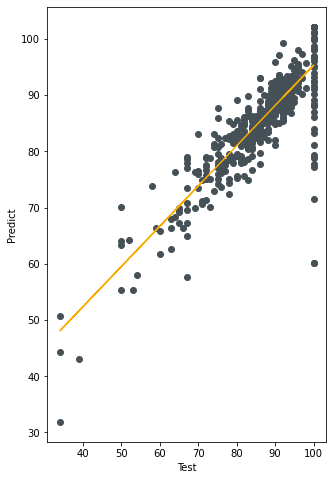

In [352]:
fig = plt.figure(figsize = (5, 8))
plt.scatter(x = y_test, y = predictions, color='#465157')
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m*y_test+b, color='#f9ac00')

plt.xlabel('Test')
plt.ylabel('Predict')
plt.show()


# souce : https://data36.com/linear-regression-in-python-numpy-polyfit/

We can see that we were able to improve our model when we dropped the price column, that is, the price probably does not affect the buyers' recommendations for buying glasses

# Conclusions

1. There are factors that influence buyers' recommendations for buying glasses. 

    The main ones are: the quality of the glasses, the rating stars and the fit of the glasses.


2. To our surprise, we discovered that the price had almost no effect on the buyers' recommendations.


3. The high quality of the glasses and their fit, influence of buyers' recommendations.


4. Our model is able to predict with 73% accuracy the recommendations of buyers